# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Naufal Yogi Aptana
- **Email:** naufalyogiaptana@gmail.com
- **ID Dicoding:** naufalyo

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan tren jumlah penyewa sepeda (cnt) sepanjang tahun?
- Seberapa besar perbandingan peminjam casual dan registered?
- Bagaimana pola musiman dalam jumlah penyewa sepeda?
- Jam berapa jumlah penyewaan sepeda tertinggi dan terendah dalam sehari pada setiap musim?

## Import Semua Packages/Library yang Digunakan

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [35]:
df = pd.read_csv('./data/hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Karakteristik dataset**

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Data ini berisi data sewa sepeda yang mencakup waktu, kondisi cuaca, dan status pengguna (casual atau terdaftar). Setiap baris menunjukkan jumlah sepeda yang dipinjam pada waktu tertentu dengan informasi tambahan seperti suhu, kelembaban, angin, hari kerja, dan lainnya.

In [37]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [38]:
df.describe(include=['object'])

,dteday
count,17379
unique,731
top,2011-01-01
freq,24


Hanya ada satu kolom yang bertipe data kategori yaitu dteday, hal ini tidak sesuai karena seharusnya bertipe data datetime

In [39]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada kolom yang memiliki nilai hilang atau NaN di dalam DataFrame

In [40]:
df.duplicated().sum()

0

Tidak ada baris yang duplikat di DataFrame

**Insight:**
- Tidak ada data yang kosong maupun duplikat

### Cleaning Data

In [41]:
#menghapus kolom yang tidak dibutuhkan karena tidak ada informasi yang dapat diambil
df = df.drop(columns=['instant', 'atemp'])

Kolom ini adalah ID unik untuk setiap baris, yang tidak memberikan informasi yang berguna, sedangkan kolom atemp dihapus karena sudah direpresentasikan dengan kolom temp

In [42]:
# Mengubah kolom dteday menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])
print(df.dteday.dtype)

datetime64[ns]


Pada kolom ini dirubah tipe data yang sebelumnnya object menjadi datetime

In [43]:
#Mapping data untuk mempermudah membaca data
df.replace({
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "mnth": {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 
             7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 
                5: "Friday", 6: "Saturday"}
}, inplace=True)

Untuk mempermudah membaca data dimapping sesuai dengan ketentuan dataset

In [44]:
# Menyesuaikan kolom temp, hum, dan windspeed agar sesuai dengan satuannya
df["temp"] = (df["temp"] * 41).round().astype(int)
df["hum"] = (df["hum"] * 100).round().astype(int)
df["windspeed"] = (df["windspeed"] * 67).round().astype(int)

Kolom temp, hum, dan windspeed disesuaikan dengan satuannya

In [45]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,Not Holiday,Saturday,Holiday,1,10,81,0,3,13,16
1,2011-01-01,Spring,2011,January,1,Not Holiday,Saturday,Holiday,1,9,80,0,8,32,40
2,2011-01-01,Spring,2011,January,2,Not Holiday,Saturday,Holiday,1,9,80,0,5,27,32
3,2011-01-01,Spring,2011,January,3,Not Holiday,Saturday,Holiday,1,10,75,0,3,10,13
4,2011-01-01,Spring,2011,January,4,Not Holiday,Saturday,Holiday,1,10,75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,Not Holiday,Monday,Working Day,2,11,60,11,11,108,119
17375,2012-12-31,Spring,2012,December,20,Not Holiday,Monday,Working Day,2,11,60,11,8,81,89
17376,2012-12-31,Spring,2012,December,21,Not Holiday,Monday,Working Day,1,11,60,11,7,83,90
17377,2012-12-31,Spring,2012,December,22,Not Holiday,Monday,Working Day,1,11,56,9,13,48,61


In [46]:
# Menyimpan DataFrame ke file CSV
data_clean = 'data_clean.csv'
df.to_csv(data_clean, index=False)

print(f"DataFrame berhasil disimpan sebagai {data_clean}")


DataFrame berhasil disimpan sebagai data_clean.csv


**Insight:**
- Data dibersihkan dengan menghapus kolom yang tidak ada informasi
- Data dengan tipe data yang masih belum sesuai diubah agar sesuai, dalam hal ini dteday yang sebelumnya object menjadi datetime
- Untuk mempermudah pemahaman data, dilakukan encoding sesuai dengan ketentuan dataset
- Menyesuaikan beberapa data, disesuaikan dengan satuannya

## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  object        
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  object        
 6   weekday     17379 non-null  object        
 7   workingday  17379 non-null  object        
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  int32         
 10  hum         17379 non-null  int32         
 11  windspeed   17379 non-null  int32         
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(6), object(5)
memory usage: 1.8+

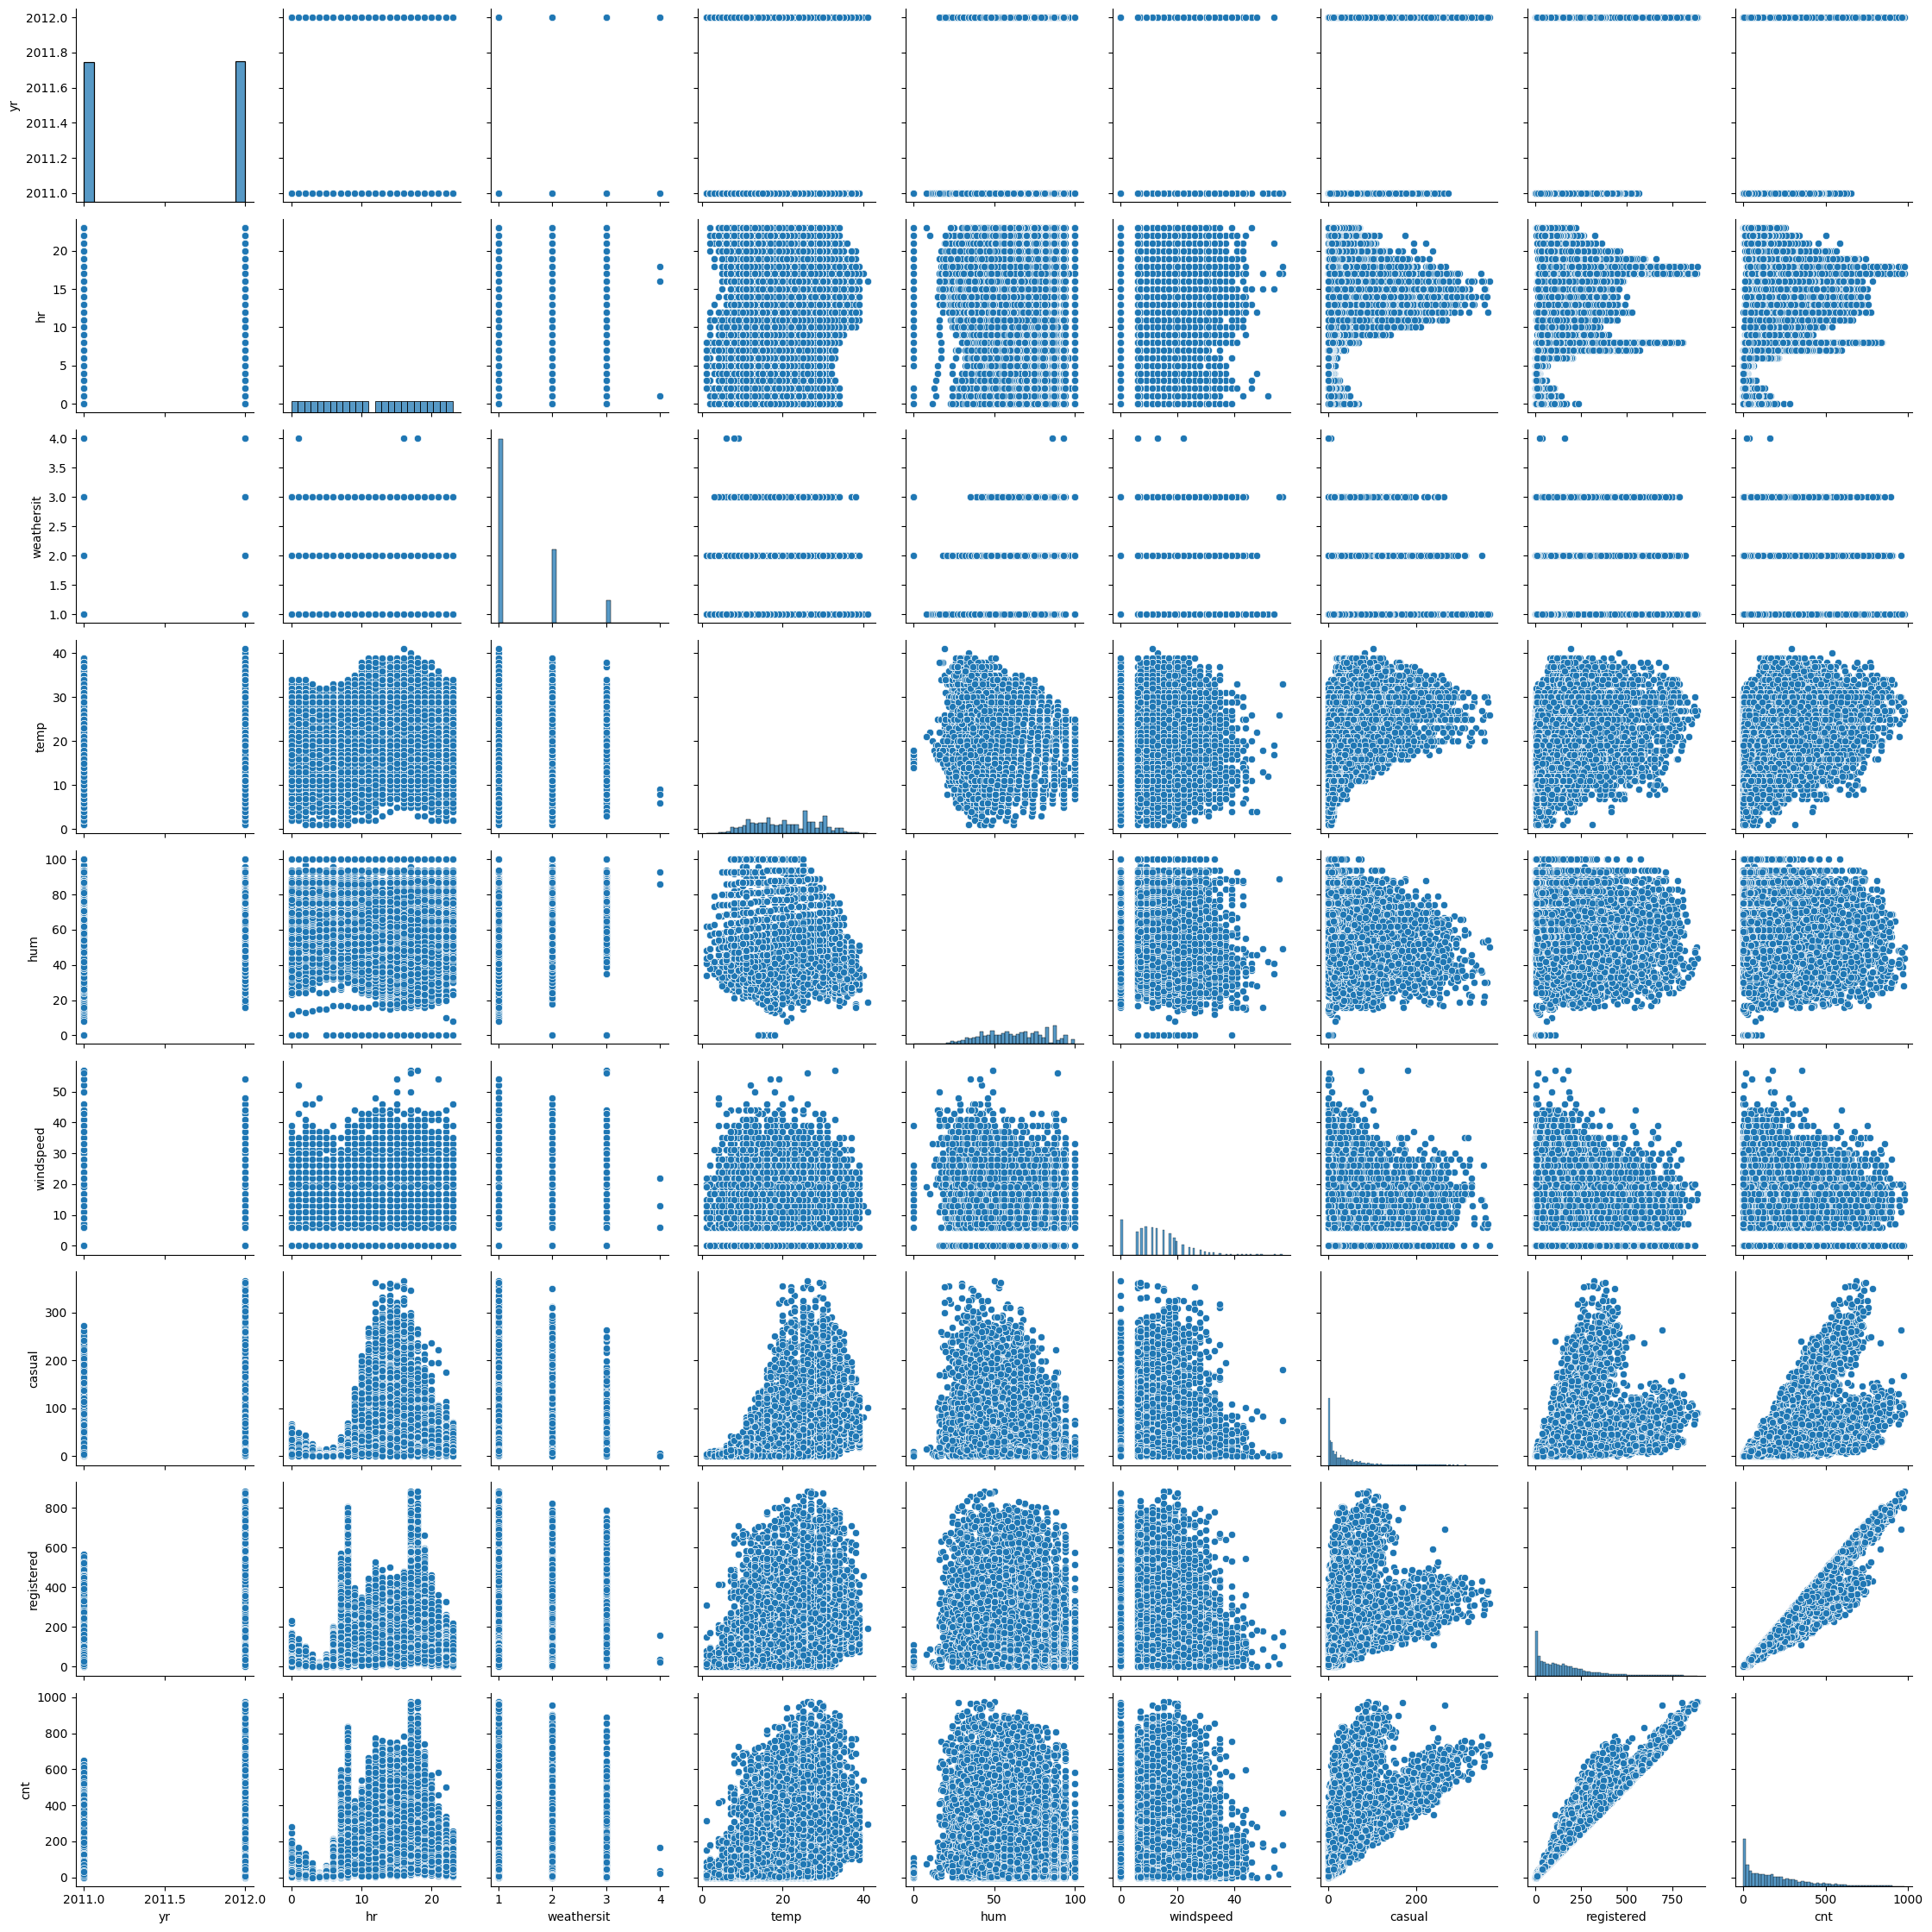

In [48]:
#Analisis korelasi antar kolom
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [49]:
# penyewaan berdasarkan musim
df.groupby(by="season").agg({"casual": ["sum"],
    "registered": ["sum"],
    "cnt": ["sum"]})

,casual,registered,cnt
,sum,sum,sum
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Data Peminjam paling banyak pada season Fall dan paling sedikit pada season Spring

In [50]:
# penyewaan berdasarkan bulan
df['year_month'] = df['dteday'].dt.to_period('M')
monthly_trend = df.groupby('year_month')[['casual', 'registered', 'cnt']].sum()
monthly_trend

,casual,registered,cnt
year_month,,,
2011-01,3073,35116,38189
2011-02,6242,41973,48215
2011-03,12826,51219,64045
2011-04,22346,72524,94870
2011-05,31050,104771,135821
2011-06,30612,112900,143512
2011-07,36452,104889,141341
2011-08,28842,107849,136691
2011-09,26545,100873,127418


Data peminjam paling banyak pada bulan September 2012 dan paling sedikit pada bulan January 2011

In [51]:
# penyewaan berdasarkan tahun
df.groupby(by="yr").agg({
    "registered": ["sum"],
    "casual": ["sum"],
    "cnt": ["sum"]
})

,registered,casual,cnt
,sum,sum,sum
yr,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


Data peminjam terjadi peningkatan dari tahun 2011 ke tahun 2012

In [52]:
# penyewaan berdasarkan hari
df.groupby(by="weekday").agg({
    "registered": ["sum"],
    "casual": ["sum"],
    "cnt": ["sum"]
})

,registered,casual,cnt
,sum,sum,sum
weekday,,,
Friday,409552,78238,487790
Monday,384719,70784,455503
Saturday,323955,153852,477807
Sunday,303506,140521,444027
Thursday,423935,61460,485395
Tuesday,411266,57843,469109
Wednesday,415729,57319,473048


Data peminjam paling banyak di hari Friday dan paling sedikit di hari Sunday

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan tren jumlah penyewa sepeda (cnt) sepanjang tahun?

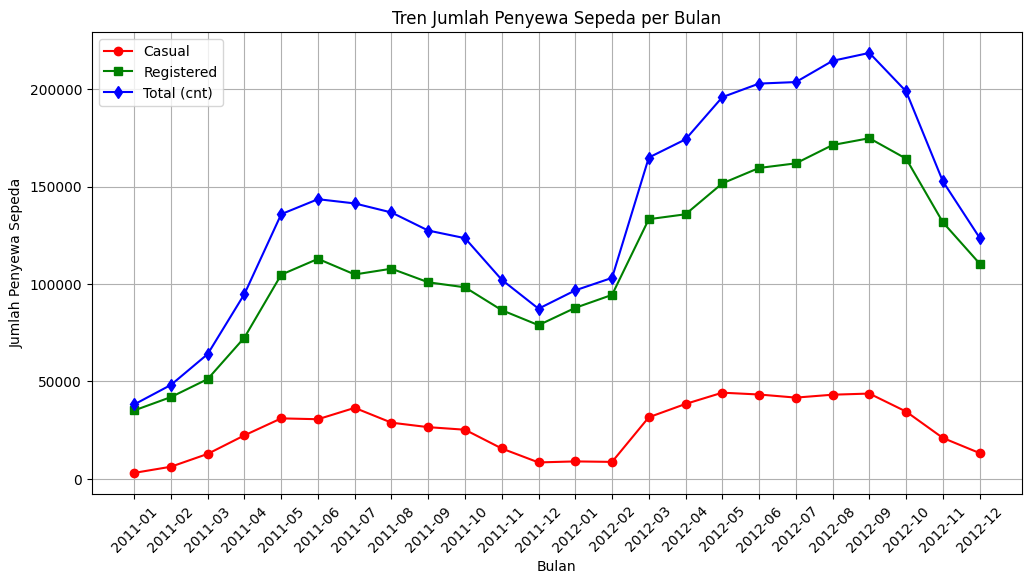

In [53]:
# Kelompokkan data berdasarkan bulan dan jumlahkan penyewaan sepeda
df['year_month'] = df['dteday'].dt.to_period('M')
monthly_trend = df.groupby('year_month')[['casual', 'registered', 'cnt']].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index.astype(str), monthly_trend['casual'], marker='o', linestyle='-', color='r', label='Casual')
plt.plot(monthly_trend.index.astype(str), monthly_trend['registered'], marker='s', linestyle='-', color='g', label='Registered')
plt.plot(monthly_trend.index.astype(str), monthly_trend['cnt'], marker='d', linestyle='-', color='b', label='Total (cnt)')

plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Tren Jumlah Penyewa Sepeda per Bulan")
plt.legend()
plt.grid(True)
plt.show()

Dibandingkan tahun 2011, jumlah penyewaan di tahun 2012 mengalami peningkatan dengan puncak di pertengahan tahun, terutama di bulan Agustus dan September

### Pertanyaan 2: Seberapa besar perbandingan peminjam casual dan registered?

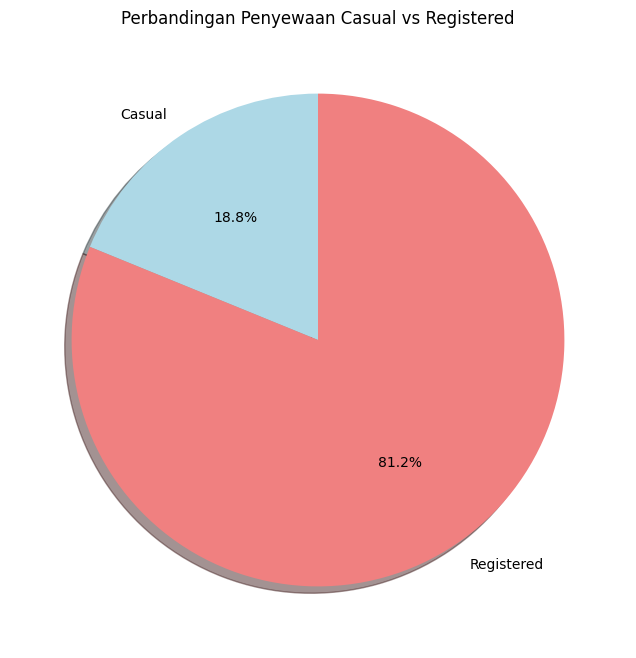

In [54]:
# Perbandingan Penyewaan Casual vs Registered
total_casual = df['casual'].sum()
total_registered = df['registered'].sum()
labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Perbandingan Penyewaan Casual vs Registered")
plt.show()

layanan penyewaan sepeda lebih banyak dimanfaatkan oleh pelanggan registered dibandingkan casual

### Pertanyaan 3: Bagaimana pola musiman dalam jumlah penyewa sepeda?

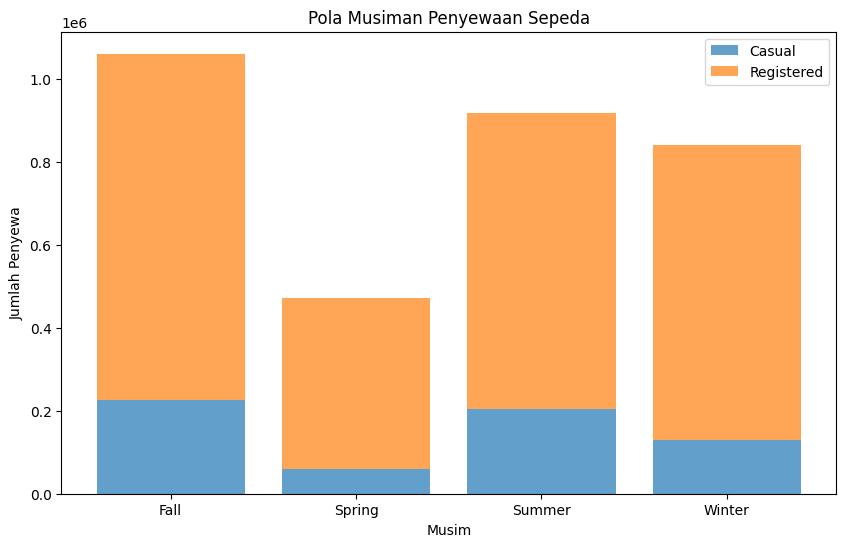

In [55]:
# Pola Musiman Penyewaan Sepeda
seasonal_trend = df.groupby('season')[['casual', 'registered', 'cnt']].sum()

plt.figure(figsize=(10, 6))
plt.bar(seasonal_trend.index, seasonal_trend['casual'], label='Casual', alpha=0.7)
plt.bar(seasonal_trend.index, seasonal_trend['registered'], bottom=seasonal_trend['casual'], label='Registered', alpha=0.7)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewa")
plt.title("Pola Musiman Penyewaan Sepeda")
plt.legend()
plt.show()

Summer dan Fall memiliki penyewaan tertinggi sedangkan Spring menunjukkan jumlah penyewaan yang lebih rendah, baik pada peminjam registered maupun casual

### Pertanyaan 4: Jam berapa jumlah penyewaan sepeda tertinggi dan terendah dalam sehari pada setiap musim?

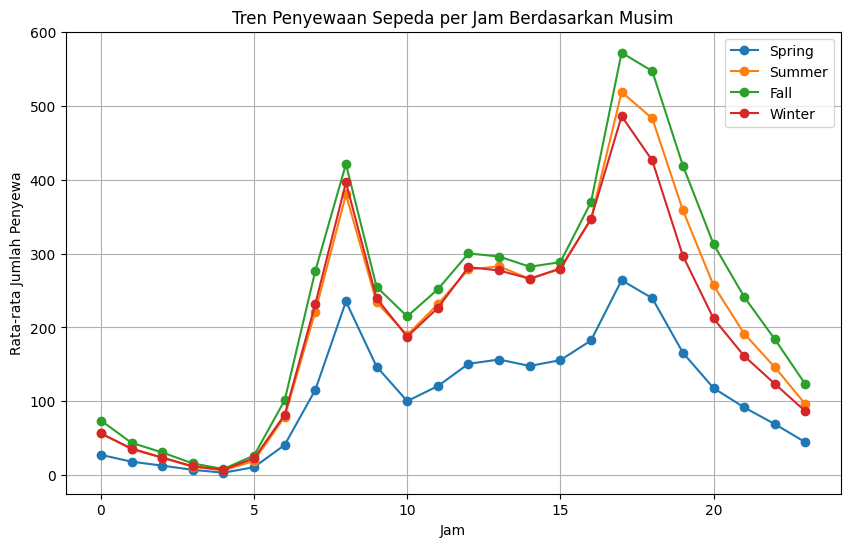

In [56]:
plt.figure(figsize=(10, 6))
for season in df['season'].unique():
    hourly_trend = df[df['season'] == season].groupby('hr')['cnt'].mean()
    plt.plot(hourly_trend.index, hourly_trend.values, marker='o', linestyle='-', label=season)

plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.title("Tren Penyewaan Sepeda per Jam Berdasarkan Musim")
plt.legend()
plt.grid(True)
plt.show()

Polanya konsisten di semua musim dan terdapat dua puncak utama dalam aktivitas penyewaan sepeda di setiap musim, yaitu pada pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00.

## Conclusion

- Dibandingkan tahun 2011, jumlah penyewaan di tahun 2012 mengalami peningkatan di semua kategori. Penyewaan mulai meningkat tajam sejak Maret 2012, dengan puncak di pertengahan tahun, terutama di bulan Agustus dan September.
- Sebagian besar penyewaan dilakukan oleh pengguna terdaftar (registered), yang menyumbang 81,2% dari total penyewaan, sedangkan Penyewaan oleh pengguna casual hanya mencakup 18,8% dari total penyewaan
- Jumlah penyewaan sepeda menunjukkan pola musiman yang jelas. Penyewaan cenderung meningkat pada musim semi dan musim panas dan menurun pada musim dingin
- Terdapat dua puncak utama dalam aktivitas penyewaan sepeda di setiap musim, yaitu pada pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00. Pola ini kemungkinan besar mencerminkan waktu perjalanan pulang-pergi kerja atau sekolah.